<a href="https://colab.research.google.com/github/jhk0530/dinosaur/blob/master/34_%EC%9C%A4%EA%B3%BD_%EA%B2%80%EC%B6%9C_%EC%97%BD%EC%84%9C%EC%9D%98_%EC%9A%B0%ED%8E%B8_%EB%B2%88%ED%98%B8_%EC%9D%B8%EC%8B%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 엽서 이미지에서 숫자가 있는 부분을 인식
2. 숫자를 개별적으로 판정

`openCV`의 `findContours()`사용



177 85 98 46
155 77 44 27
232 43 56 32
184 31 48 39


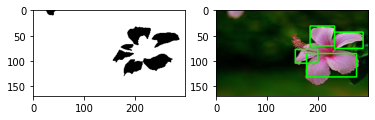

In [15]:
import cv2
import matplotlib.pyplot as plt

# image read / resize

img = cv2.imread('flower.jpg')
img = cv2.resize(img, (300,169))

# image color scale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (7,7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

plt.subplot(1,2,1)
plt.imshow(im2, cmap = 'gray')

# contour

cnts, hiearchy = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for pt in cnts:
  x, y, w, h = cv2.boundingRect(pt)

  if w < 30 or w > 200 : continue
  print (x,y,w,h)
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.jpg", dpi = 200)
plt.show()


## 엽서에서 우편번호 영역 검출



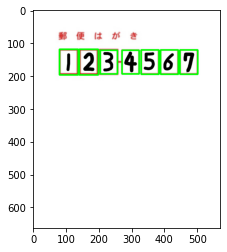

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 0.19.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed;

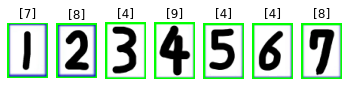

In [25]:
import cv2
import matplotlib.pyplot as plt

def detect_zipno(fname):
  img = cv2.imread(fname)
  h,w = img.shape[:2]
  img = img[0:h//2, w//3:]

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  gray = cv2.GaussianBlur(gray, (3,3), 0)
  im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]

  cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

  result = []
  for pt in cnts:
    x,y,w,h = cv2.boundingRect(pt)
    if not (50 < w < 70): continue
    result.append([x,y,w,h])

  result = sorted(result, key = lambda x: x[0])

  result2 = []
  lastx = -100

  for x,y,w,h in result:
    if(x-lastx)<10:continue
    result2.append([x,y,w,h])
    lastx = x

  for x,y,w,h in result2:
    cv2.rectangle(img,(x,y), (x+w,y+h), (0,255,0),3)
  
  return result2,img


cnts, img = detect_zipno('hagaki1.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.savefig('detect-zip.png', dpi =200)
plt.show()


from sklearn.externals import joblib

clf = joblib.load('digits.pkl')

for i, pt in enumerate(cnts):
  x,y,w,h = pt
  #x += 8
  #y += 8
  #w -= 16
  #h -= 16

  im2 = img[y:y+h, x:x+w]

  im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  im2gray = cv2.resize(im2gray, (8,8))
  im2gray = 15 - im2gray
  im2gray = im2gray.reshape((-1,64))

  res = clf.predict(im2gray)

  plt.subplot(1,7,i+1)
  plt.imshow(im2)
  plt.axis('off')
  plt.title(res)

plt.show()

손글씨 인식률 떨어지는건 모델이 구데기여서 그런것 같다.
